In [2]:
from typing import Callable, Tuple
from finite_distributions.FiniteDistribution import FiniteDistribution
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sinkhorn.SinkhornRunner as SinkhornRunner
import sinkhorn.SinkhornKernels as skern
import visualizer.joint_distribution_visualizer as jdv

In [3]:
def gaussian_prob(mu: float, sigma: float, x: float):
    return np.exp(-(x - mu)**2 / (2 * sigma * sigma))

In [17]:
mu_1 = -0.0
sigma_1 = 1.0

mu_2_1 = 3.5
mu_2_2 = -3.5
sigma_2 = np.sqrt(0.25)

In [18]:
xs = [round(x, 5) for x in np.linspace(-5, 5, 25)]

In [19]:
s1 = np.sum([gaussian_prob(mu_1, sigma_1, x) for x in xs])
s2 = np.sum([(gaussian_prob(mu_2_1, sigma_2, x) + gaussian_prob(mu_2_2, sigma_2, x))/2 for x in xs])

dist_1 = FiniteDistribution({x: gaussian_prob(mu_1, sigma_1, x) / s1 for x in xs})
dist_2 = FiniteDistribution({x: (gaussian_prob(mu_2_1, sigma_2, x) + gaussian_prob(mu_2_2, sigma_2, x))/2 / s2 for x in xs})

In [20]:
epsilon = 1.0
c = lambda x, y: (x - y)**2

In [21]:
# p-norm
p = 2.
sinkhorn_runner = skern.get_pnorm_regularized_runner(p, c)
# entropic
sinkhorn_runner_entropic = skern.get_entropically_regularized_runner(c)


epsilon = 1.0
delta = 0.01

pi_p, f_p, g_p = sinkhorn_runner.run_sinkhorn(dist_1, dist_2, epsilon, delta)
pi_e, f_e, g_e = sinkhorn_runner_entropic.run_sinkhorn(dist_1, dist_2, epsilon, delta)

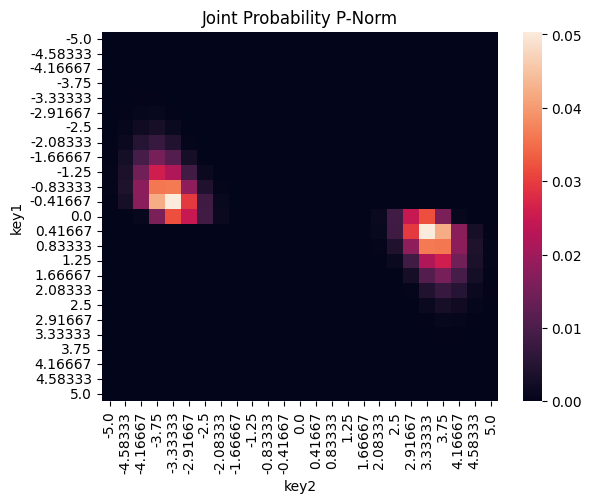

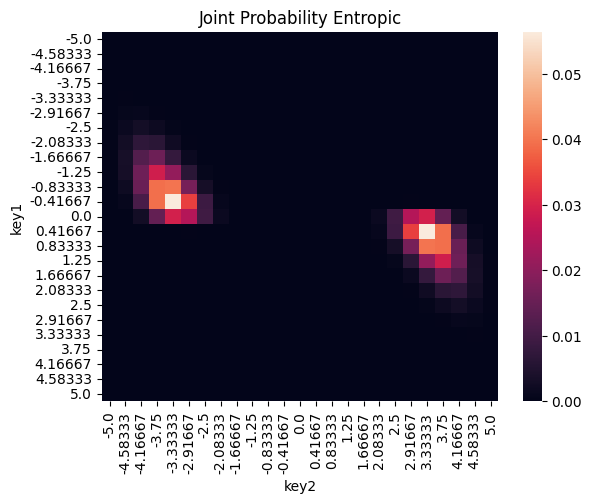

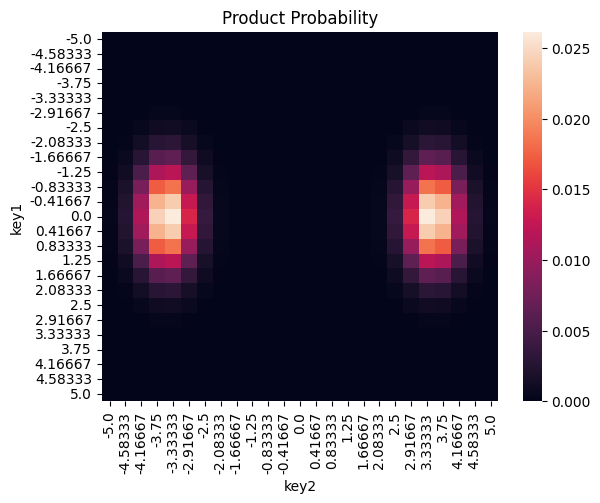

In [22]:
jdv.visualize_joint_probability(pi_p, title = "Joint Probability P-Norm", annot = True)

jdv.visualize_joint_probability(pi_e, title = "Joint Probability Entropic", annot = True)

# jdv.visualize_joint_probability(optimal_transport, title = "Unregularized Optimum", annot = False)

product = dist_1.productDistribution(dist_2)
jdv.visualize_joint_probability(product, title = "Product Probability", annot = False)

### 